# Using Python tools for a analysis of COVID-19 data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

### Obs.: Plotly doesn't open in Github. Please download notebook to use.

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
pd.options.display.float_format = '{:.4f}'.format

### <span style="color:red">Selecting Countries by the following conditions: 50k total cases and 35k deaths</span>

In [4]:
numberCases = 50000
numberDeaths = 35000

### <span style="color:red">Analysis of the last N days</span>

In [5]:
Ndays = '150days'

###  <span style="color:red">Day range for matplotlib</span>

In [6]:
Ninterval = 10

In [7]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [8]:
# filename = '/home/davi/Documents/Python/Covid-19-Data/owid-covid-data.csv'

In [9]:
# df = pd.read_csv(filename)
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

iso_code continent       location       date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan 2019-12-31       0.0000     0.0000   
1          AFG      Asia    Afghanistan 2020-01-01       0.0000     0.0000   
2          AFG      Asia    Afghanistan 2020-01-02       0.0000     0.0000   
3          AFG      Asia    Afghanistan 2020-01-03       0.0000     0.0000   
4          AFG      Asia    Afghanistan 2020-01-04       0.0000     0.0000   
...        ...       ...            ...        ...          ...        ...   
36552      NaN       NaN  International 2020-02-28     705.0000     0.0000   
36553      NaN       NaN  International 2020-02-29     705.0000     0.0000   
36554      NaN       NaN  International 2020-03-01     705.0000     0.0000   
36555      NaN       NaN  International 2020-03-02     705.0000     0.0000   
36556      NaN       NaN  International 2020-03-10     696.0000    -9.0000   

       total_deaths  new_deaths  total_cases_per_million  \
0            0.0000      0.0000                   0.0000   
1            0.0000      0.0000                   0.0000   
2            0.0000      0.0000                   0.0000   
3            0.0000      0.0000                   0.0000   
4            0.0000      0.0000                   0.0000   
...             ...         ...                      ...   
36552        4.0000      0.0000                      nan   
36553        6.0000      2.0000                      nan   
36554        6.0000      0.0000                      nan   
36555        6.0000      0.0000                      nan   
36556        7.0000      1.0000                      nan   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
0                     0.0000  ...         1.3370       1803.9870   
1                     0.0000  ...         1.3370       1803.9870   
2                     0.0000  ...         1.3370       1803.9870   
3                     0.0000  ...         1.3370       1803.9870   
4                     0.0000  ...         1.3370       1803.9870   
...                      ...  ...            ...             ...   
36552                    nan  ...            nan             nan   
36553                    nan  ...            nan             nan   
36554                    nan  ...            nan             nan   
36555                    nan  ...            nan             nan   
36556                    nan  ...            nan             nan   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  nan               597.0290               9.5900   
1                  nan               597.0290               9.5900   
2                  nan               597.0290               9.5900   
3                  nan               597.0290               9.5900   
4                  nan               597.0290               9.5900   
...                ...                    ...                  ...   
36552              nan                    nan                  nan   
36553              nan                    nan                  nan   
36554              nan                    nan                  nan   
36555              nan                    nan                  nan   
36556              nan                    nan                  nan   

       female_smokers  male_smokers  handwashing_facilities  \
0                 nan           nan                 37.7460   
1                 nan           nan                 37.7460   
2                 nan           nan                 37.7460   
3                 nan           nan                 37.7460   
4                 nan           nan                 37.7460   
...               ...           ...                     ...   
36552             nan           nan                     nan   
36553             nan           nan                     nan   
36554             nan           nan                     nan   
36555             nan           nan                     nan 

In [10]:
list(df.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy']

In [11]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[df['date'] > pd.to_datetime("today") - pd.to_timedelta(Ndays)]
df = df.sort_values(by=['total_cases'], ascending=True)
df

date          location  total_cases  total_deaths  new_cases  \
22970 2020-03-17           Myanmar       0.0000        0.0000     0.0000   
23348 2020-03-22             Nepal       1.0000        0.0000     0.0000   
23347 2020-03-21             Nepal       1.0000        0.0000     0.0000   
23346 2020-03-20             Nepal       1.0000        0.0000     0.0000   
25737 2020-04-04  Papua New Guinea       1.0000        0.0000     0.0000   
...          ...               ...          ...           ...        ...   
14918 2020-08-01         Hong Kong          nan           nan        nan   
14919 2020-08-02         Hong Kong          nan           nan        nan   
14920 2020-08-03         Hong Kong          nan           nan        nan   
14921 2020-08-04         Hong Kong          nan           nan        nan   
23941 2020-03-17       New Zealand          nan           nan        nan   

       new_deaths  
22970      0.0000  
23348      0.0000  
23347      0.0000  
23346      0.0000  
25737      0.0000  
...           ...  
14918         nan  
14919         nan  
14920         nan  
14921         nan  
23941         nan  

[30869 rows x 6 columns]

# Number of cases and deaths in World

In [12]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld = dfWorld.loc[:,['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dfWorld.reset_index(drop=True, inplace=True)
dfWorld

date   total_cases  total_deaths   new_cases  new_deaths
0   2020-03-17   187486.0000     7137.0000  14206.0000    608.0000
1   2020-03-18   204421.0000     7949.0000  16935.0000    812.0000
2   2020-03-19   224618.0000     8908.0000  20197.0000    959.0000
3   2020-03-20   255698.0000     9968.0000  31080.0000   1060.0000
4   2020-03-21   287620.0000    11352.0000  31922.0000   1384.0000
..         ...           ...           ...         ...         ...
145 2020-08-09 19625886.0000   726846.0000 267084.0000   5673.0000
146 2020-08-10 19855145.0000   731334.0000 229259.0000   4488.0000
147 2020-08-11 20075163.0000   736317.0000 220018.0000   4983.0000
148 2020-08-12 20334160.0000   742426.0000 258997.0000   6109.0000
149 2020-08-13 20614014.0000   749444.0000 279854.0000   7018.0000

[150 rows x 5 columns]

In [13]:
timestamps = sorted(set(dfWorld.loc[:, 'date'].values))
timestamps

[numpy.datetime64('2020-03-17T00:00:00.000000000'),
 numpy.datetime64('2020-03-18T00:00:00.000000000'),
 numpy.datetime64('2020-03-19T00:00:00.000000000'),
 numpy.datetime64('2020-03-20T00:00:00.000000000'),
 numpy.datetime64('2020-03-21T00:00:00.000000000'),
 numpy.datetime64('2020-03-22T00:00:00.000000000'),
 numpy.datetime64('2020-03-23T00:00:00.000000000'),
 numpy.datetime64('2020-03-24T00:00:00.000000000'),
 numpy.datetime64('2020-03-25T00:00:00.000000000'),
 numpy.datetime64('2020-03-26T00:00:00.000000000'),
 numpy.datetime64('2020-03-27T00:00:00.000000000'),
 numpy.datetime64('2020-03-28T00:00:00.000000000'),
 numpy.datetime64('2020-03-29T00:00:00.000000000'),
 numpy.datetime64('2020-03-30T00:00:00.000000000'),
 numpy.datetime64('2020-03-31T00:00:00.000000000'),
 numpy.datetime64('2020-04-01T00:00:00.000000000'),
 numpy.datetime64('2020-04-02T00:00:00.000000000'),
 numpy.datetime64('2020-04-03T00:00:00.000000000'),
 numpy.datetime64('2020-04-04T00:00:00.000000000'),
 numpy.datet

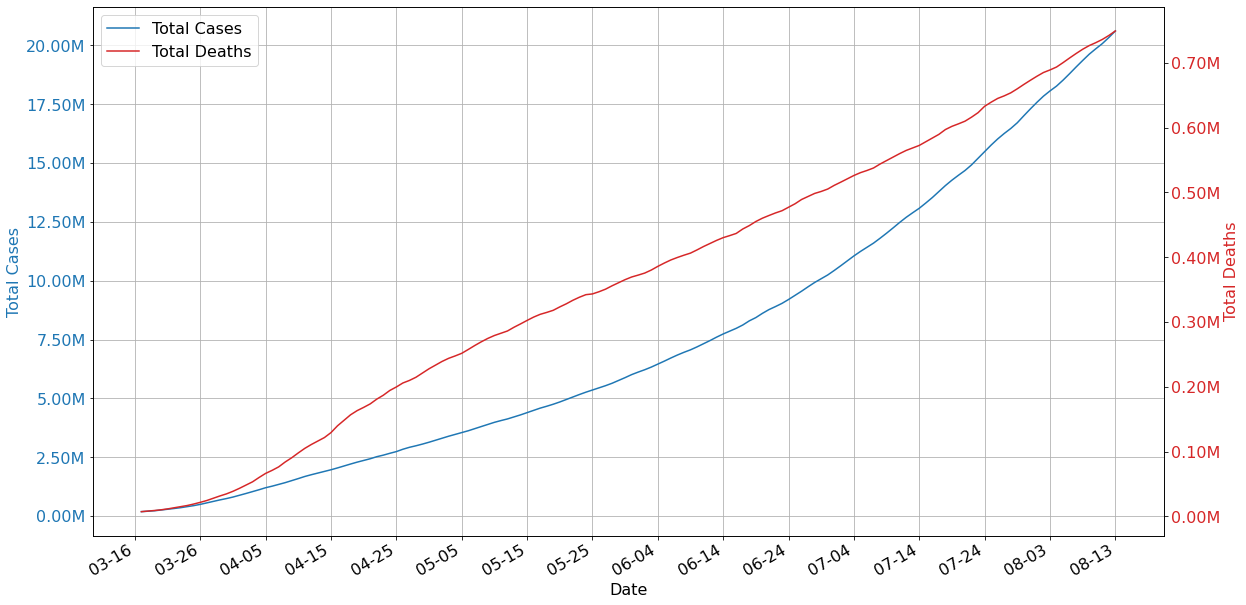

In [14]:
fig, ax1 = plt.subplots(figsize=(19.20,10.80))

color = 'tab:blue'
ax1.plot(dfWorld.date, dfWorld.total_cases, color=color, label='Total Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(dfWorld.date, dfWorld.total_deaths, color=color, label = 'Total Deaths')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
plt.gcf().autofmt_xdate()

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

plt.show()

### Daily deaths [WORLD]

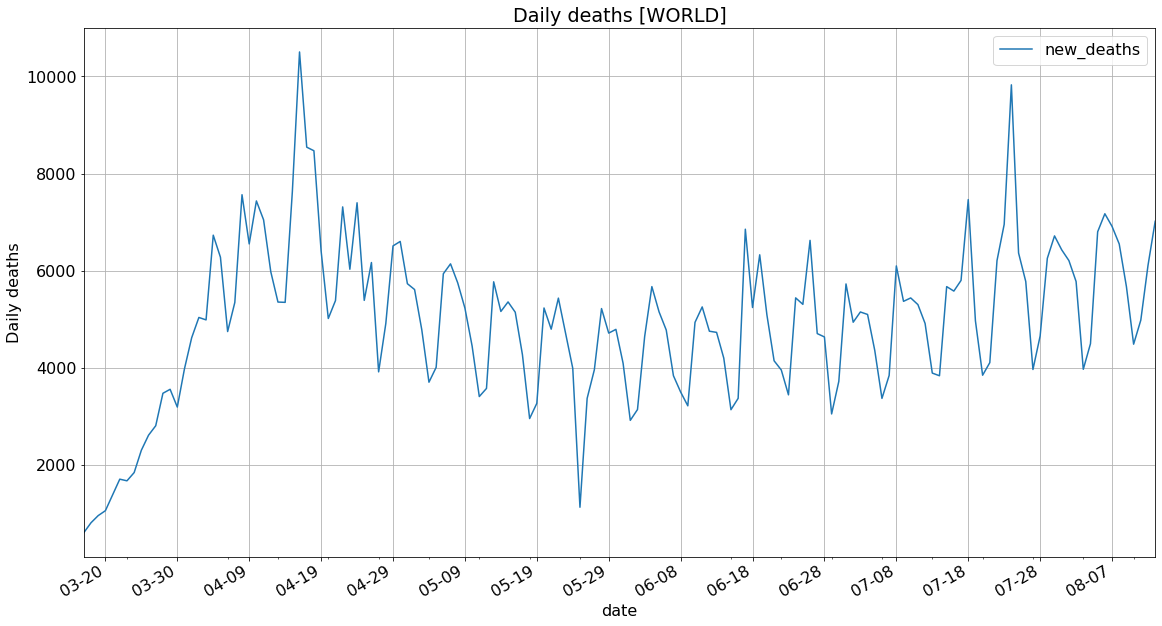

In [15]:
dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Daily deaths')
plt.title('Daily deaths [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

#### Plotly example

In [16]:
figWorld = go.Figure()
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.new_deaths, name='Daily Deaths'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(xaxis_tickformat = '%m-%d',
                       title='Daily Deaths [WORLD]')

figWorld.update_xaxes(nticks=25, tickangle=315)
figWorld.show()

### Daily cases [WORLD]

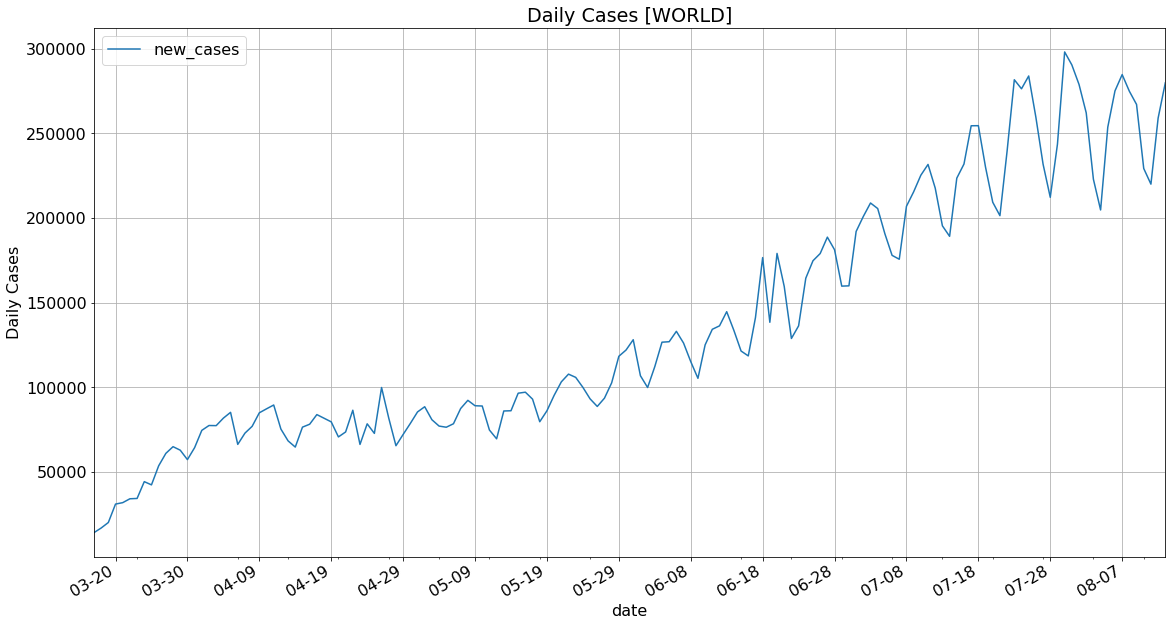

In [17]:
dfWorld.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Daily Cases')
plt.title('Daily Cases [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [18]:
mainCountries = df[
        (df['total_cases'] >= numberCases) & 
        (df['total_deaths'] >= numberDeaths) &
        (df['location'] != 'World') &
        (df['location'] != 'International')
]
mainCountries = mainCountries.sort_values(by=['total_cases'], ascending=False)
mainCountries = mainCountries.dropna()
mainCountries

date        location  total_cases  total_deaths  new_cases  \
34760 2020-08-13   United_States 5197148.0000   166027.0000 55941.0000   
34759 2020-08-12   United_States 5141207.0000   164537.0000 46813.0000   
34758 2020-08-11   United_States 5094394.0000   163461.0000 49530.0000   
34757 2020-08-10   United_States 5044864.0000   162938.0000 46847.0000   
34756 2020-08-09   United_States 4998017.0000   162425.0000 56221.0000   
...          ...             ...          ...           ...        ...   
34452 2020-05-24  United_Kingdom  243081.0000    36734.0000  2062.0000   
34451 2020-05-23  United_Kingdom  241019.0000    36451.0000  2574.0000   
34450 2020-05-22  United_Kingdom  238445.0000    36093.0000  2718.0000   
34449 2020-05-21  United_Kingdom  235727.0000    35755.0000  3052.0000   
34448 2020-05-20  United_Kingdom  232675.0000    35386.0000  2589.0000   

       new_deaths  
34760   1490.0000  
34759   1076.0000  
34758    523.0000  
34757    513.0000  
34756   1069.0000  
...           ...  
34452    283.0000  
34451    358.0000  
34450    338.0000  
34449    369.0000  
34448    548.0000  

[347 rows x 6 columns]

In [19]:
dfCountry = mainCountries['location'].astype(str).unique()
dfCountry

array(['United_States', 'Brazil', 'India', 'Mexico', 'United_Kingdom',
       'Italy'], dtype=object)

In [20]:
d = {}
for index in range(len(dfCountry)):
    d[index] = df[df['location'] == dfCountry[index]]
    d[index].reset_index(drop=True, inplace=True)

In [21]:
d[1]

date location  total_cases  total_deaths  new_cases  new_deaths
0   2020-03-17   Brazil     234.0000        0.0000    34.0000      0.0000
1   2020-03-18   Brazil     291.0000        1.0000    57.0000      1.0000
2   2020-03-19   Brazil     428.0000        4.0000   137.0000      3.0000
3   2020-03-20   Brazil     621.0000        6.0000   193.0000      2.0000
4   2020-03-21   Brazil     904.0000       11.0000   283.0000      5.0000
..         ...      ...          ...           ...        ...         ...
145 2020-08-09   Brazil 3012412.0000   100477.0000 49970.0000    905.0000
146 2020-08-10   Brazil 3035422.0000   101049.0000 23010.0000    572.0000
147 2020-08-11   Brazil 3057470.0000   101752.0000 22048.0000    703.0000
148 2020-08-12   Brazil 3109630.0000   103026.0000 52160.0000   1274.0000
149 2020-08-13   Brazil 3164785.0000   104201.0000 55155.0000   1175.0000

[150 rows x 6 columns]

In [22]:
totalCases_list=[]
totalDeaths_list=[]
newCases_list=[]
newDeaths_list=[]

for index in range(len(dfCountry)):  
    
    totalCases = [d[index]['total_cases']]
    totalDeaths = [d[index]['total_deaths']]
    newCases = [d[index]['new_cases']]
    newDeaths = [d[index]['new_deaths']]
    
    header = [dfCountry[index]]
    
    totalCases = pd.concat(totalCases, axis=1, keys=header)
    totalDeaths = pd.concat(totalDeaths, axis=1, keys=header)
    newCases = pd.concat(newCases, axis=1, keys=header)
    newDeaths = pd.concat(newDeaths, axis=1, keys=header)
    
    totalCases_list.append(totalCases)
    totalDeaths_list.append(totalDeaths)
    newCases_list.append(newCases)
    newDeaths_list.append(newDeaths)

In [23]:
dfTotalCases=[]
dfTotalDeaths=[]
dfNewCases=[]
dfNewDeaths=[]

for index in range(len(dfCountry)):
    dfTotalCases = pd.concat(totalCases_list, axis=1)
    dfTotalDeaths = pd.concat(totalDeaths_list, axis=1)
    dfNewCases = pd.concat(newCases_list, axis=1)
    dfNewDeaths = pd.concat(newDeaths_list,axis=1)
    
dfTotalCases.insert(0, 'date', timestamps)
dfTotalDeaths.insert(0, 'date', timestamps)
dfNewCases.insert(0, 'date', timestamps)
dfNewDeaths.insert(0, 'date', timestamps)

## <ins>Total cases</ins> in the most affected countries

In [24]:
dfTotalCases.sort_values(by=['date'], ascending=True)

date  United_States       Brazil        India      Mexico  \
0   2020-03-17      4661.0000     234.0000     125.0000     82.0000   
1   2020-03-18      6427.0000     291.0000     137.0000     93.0000   
2   2020-03-19      9415.0000     428.0000     165.0000    118.0000   
3   2020-03-20     14250.0000     621.0000     191.0000    164.0000   
4   2020-03-21     19624.0000     904.0000     231.0000    203.0000   
..         ...            ...          ...          ...         ...   
145 2020-08-09   4998017.0000 3012412.0000 2153010.0000 475902.0000   
146 2020-08-10   5044864.0000 3035422.0000 2215074.0000 480278.0000   
147 2020-08-11   5094394.0000 3057470.0000 2268675.0000 485836.0000   
148 2020-08-12   5141207.0000 3109630.0000 2329638.0000 492522.0000   
149 2020-08-13   5197148.0000 3164785.0000 2396637.0000 498380.0000   

     United_Kingdom       Italy  
0         3047.0000  27980.0000  
1         3658.0000  31506.0000  
2         4427.0000  35713.0000  
3         5426.0000  41035.0000  
4         6481.0000  47021.0000  
..              ...         ...  
145     309763.0000 250103.0000  
146     310825.0000 250566.0000  
147     311641.0000 250825.0000  
148     312789.0000 251237.0000  
149     313798.0000 251713.0000  

[150 rows x 7 columns]

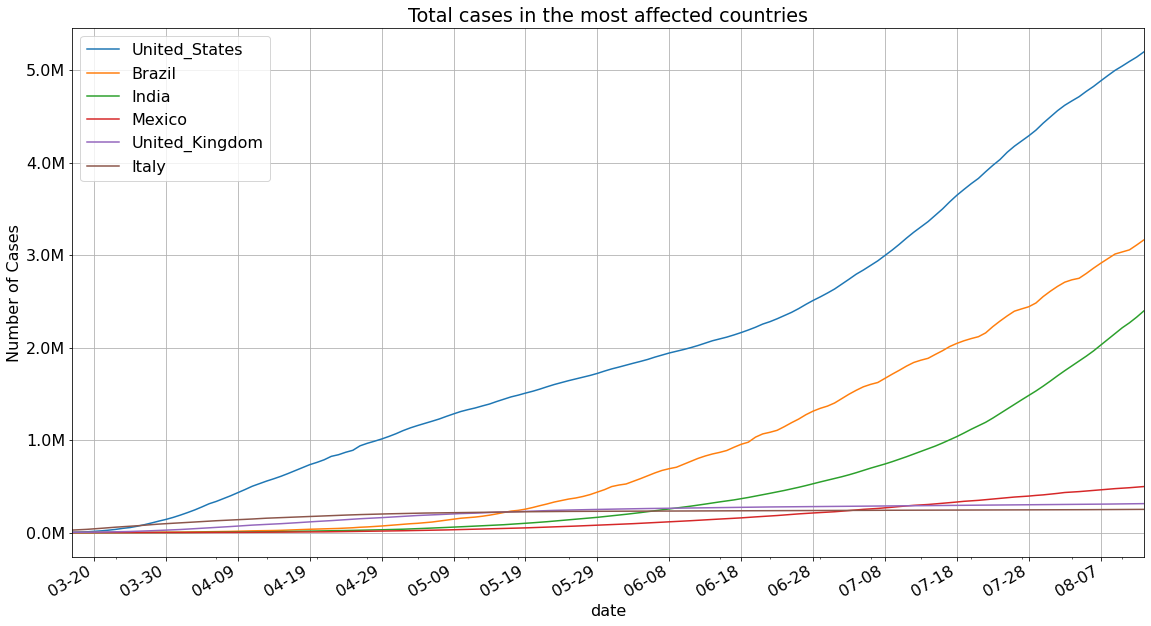

In [25]:
dfTotalCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total cases in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.1f}'.format(y/1000000) + 'M'))

plt.grid()
plt.show()

## Log analysis - log<sub>b</sub><sup>x</sup>

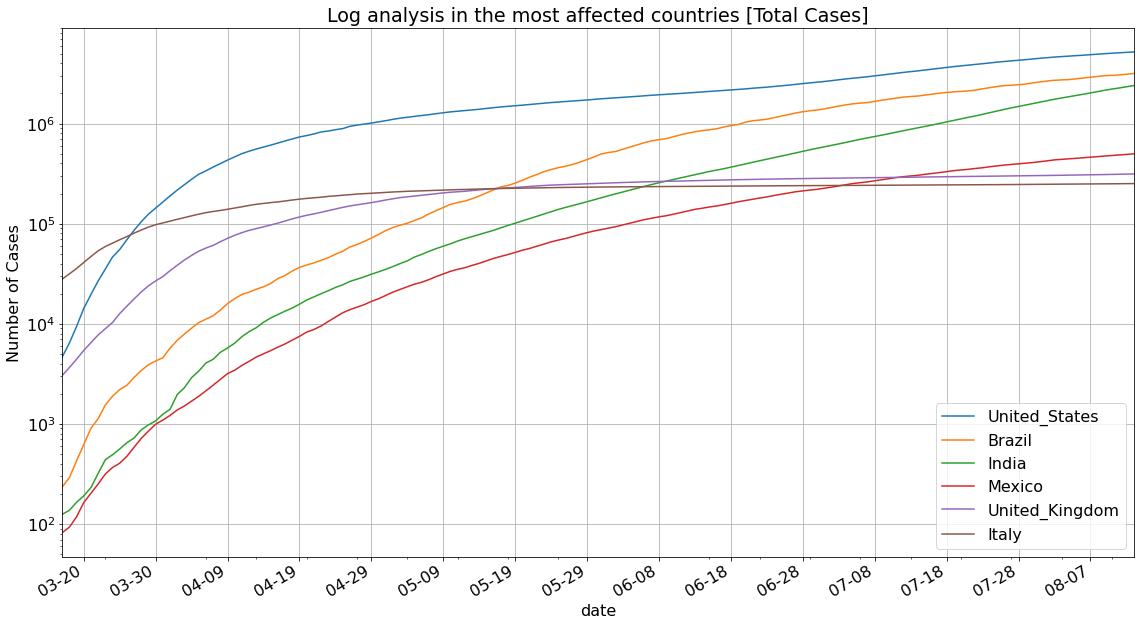

In [26]:
dfTotalCases.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Log analysis in the most affected countries [Total Cases]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

## <ins>Total Deaths</ins> in the most affected countries

In [27]:
dfTotalDeaths.sort_values(by=['date'], ascending=True)

date  United_States      Brazil      India     Mexico  \
0   2020-03-17        85.0000      0.0000     3.0000     0.0000   
1   2020-03-18       108.0000      1.0000     3.0000     0.0000   
2   2020-03-19       150.0000      4.0000     3.0000     0.0000   
3   2020-03-20       150.0000      6.0000     4.0000     0.0000   
4   2020-03-21       260.0000     11.0000     4.0000     2.0000   
..         ...            ...         ...        ...        ...   
145 2020-08-09    162425.0000 100477.0000 43379.0000 52006.0000   
146 2020-08-10    162938.0000 101049.0000 44386.0000 52298.0000   
147 2020-08-11    163461.0000 101752.0000 45257.0000 53003.0000   
148 2020-08-12    164537.0000 103026.0000 46091.0000 53929.0000   
149 2020-08-13    166027.0000 104201.0000 47033.0000 54666.0000   

     United_Kingdom      Italy  
0           65.0000  2158.0000  
1           81.0000  2505.0000  
2          115.0000  2978.0000  
3          158.0000  3407.0000  
4          194.0000  4032.0000  
..              ...        ...  
145      46566.0000 35203.0000  
146      46574.0000 35205.0000  
147      46526.0000 35209.0000  
148      46526.0000 35215.0000  
149      46706.0000 35225.0000  

[150 rows x 7 columns]

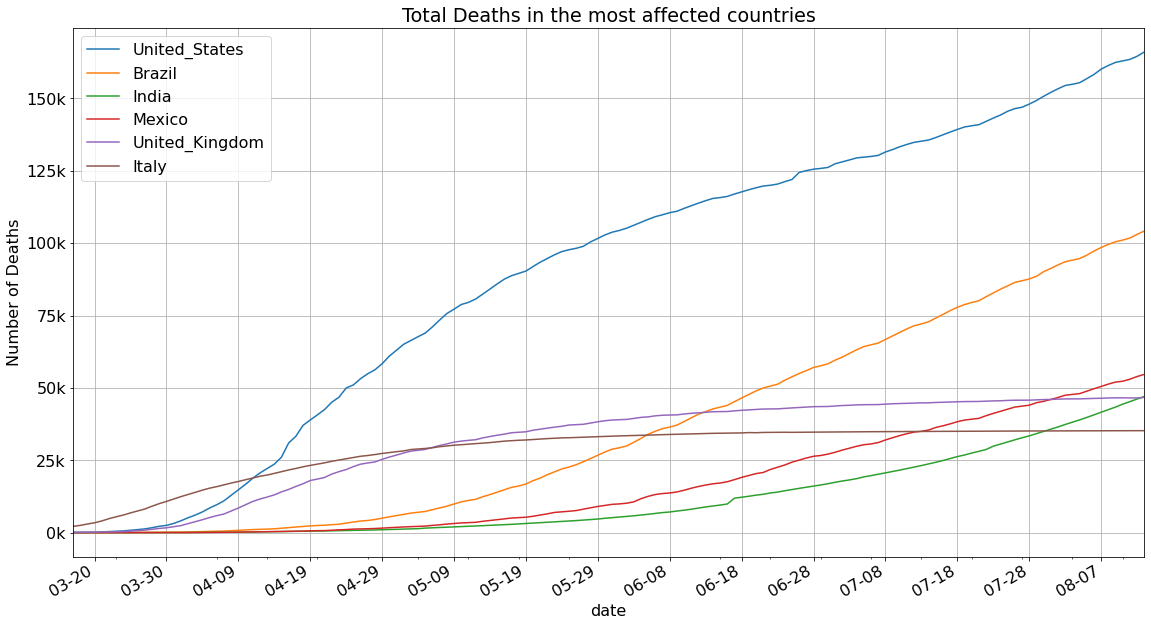

In [28]:
dfTotalDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Deaths')
plt.title('Total Deaths in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

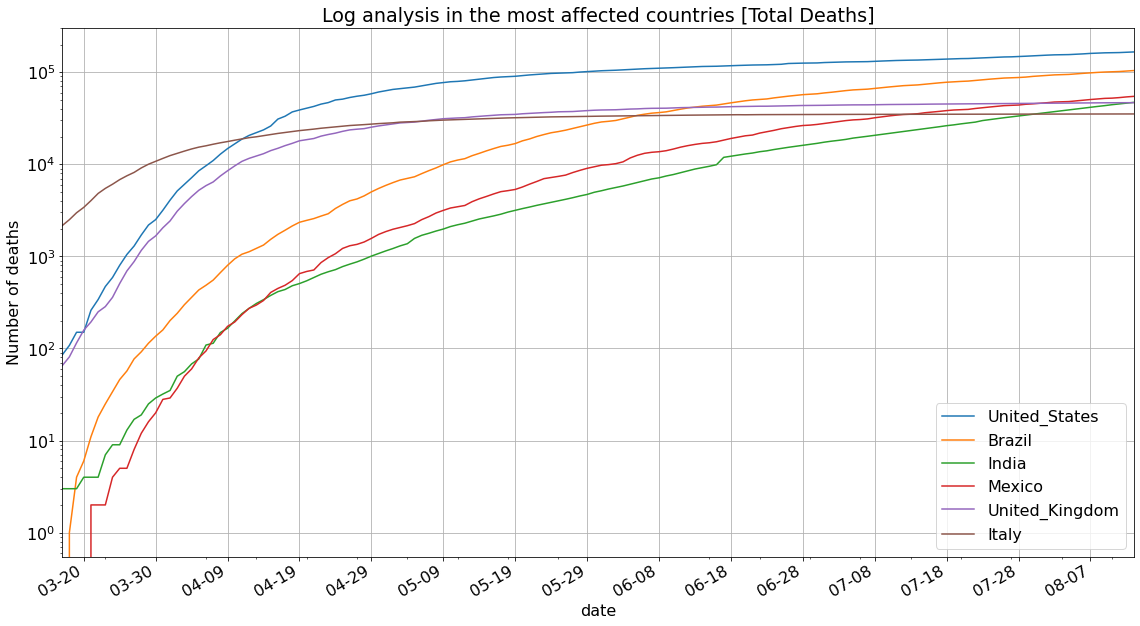

In [29]:
dfTotalDeaths.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Log analysis in the most affected countries [Total Deaths]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Total cases and deaths by country

In [30]:
dfTotalCases

date  United_States       Brazil        India      Mexico  \
0   2020-03-17      4661.0000     234.0000     125.0000     82.0000   
1   2020-03-18      6427.0000     291.0000     137.0000     93.0000   
2   2020-03-19      9415.0000     428.0000     165.0000    118.0000   
3   2020-03-20     14250.0000     621.0000     191.0000    164.0000   
4   2020-03-21     19624.0000     904.0000     231.0000    203.0000   
..         ...            ...          ...          ...         ...   
145 2020-08-09   4998017.0000 3012412.0000 2153010.0000 475902.0000   
146 2020-08-10   5044864.0000 3035422.0000 2215074.0000 480278.0000   
147 2020-08-11   5094394.0000 3057470.0000 2268675.0000 485836.0000   
148 2020-08-12   5141207.0000 3109630.0000 2329638.0000 492522.0000   
149 2020-08-13   5197148.0000 3164785.0000 2396637.0000 498380.0000   

     United_Kingdom       Italy  
0         3047.0000  27980.0000  
1         3658.0000  31506.0000  
2         4427.0000  35713.0000  
3         5426.0000  41035.0000  
4         6481.0000  47021.0000  
..              ...         ...  
145     309763.0000 250103.0000  
146     310825.0000 250566.0000  
147     311641.0000 250825.0000  
148     312789.0000 251237.0000  
149     313798.0000 251713.0000  

[150 rows x 7 columns]

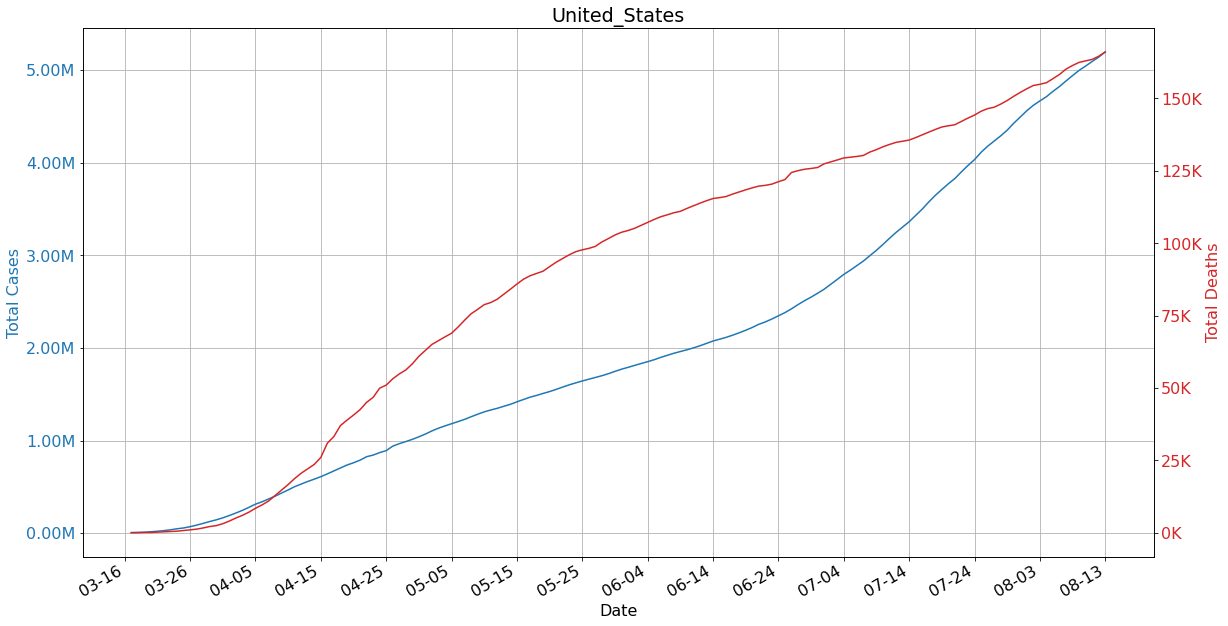

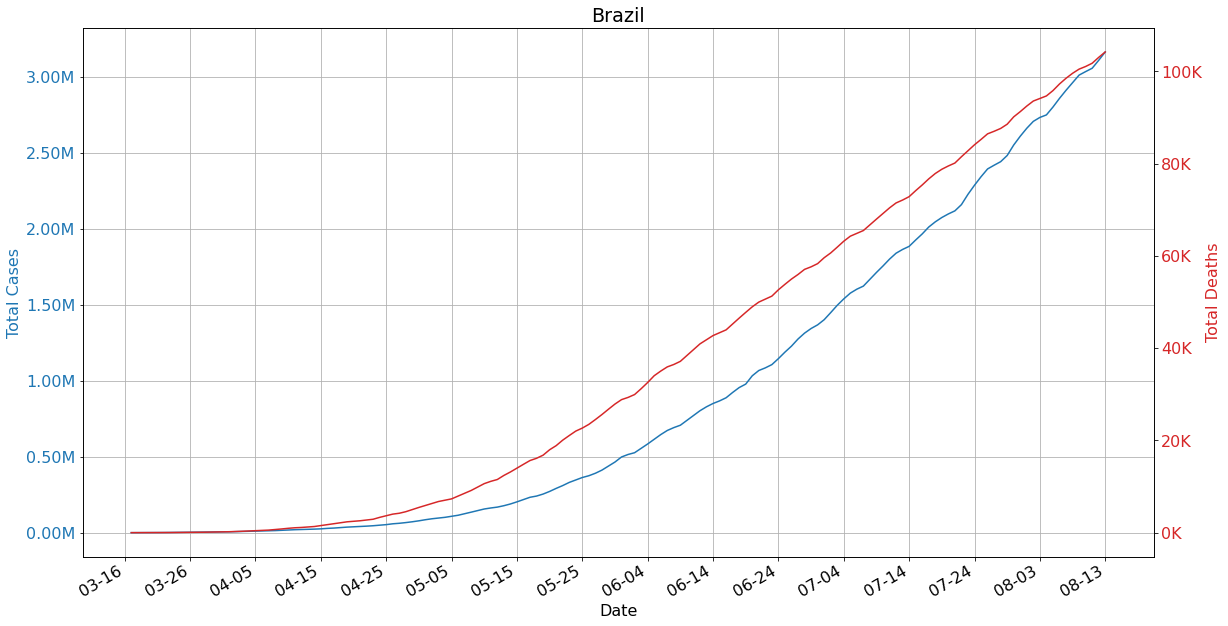

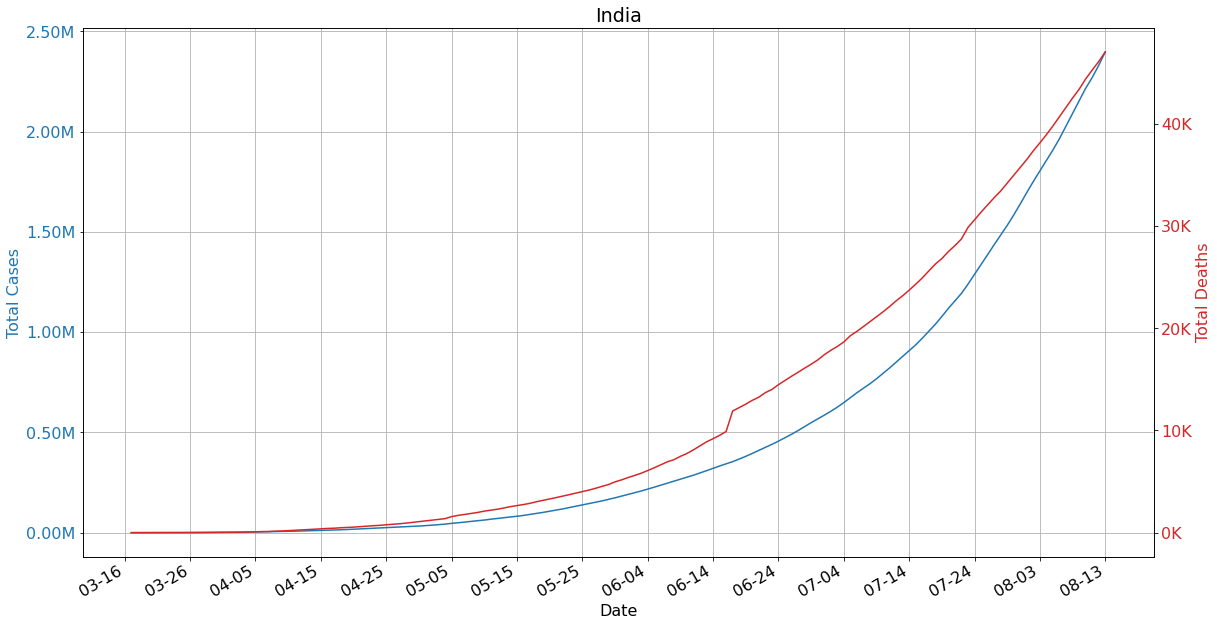

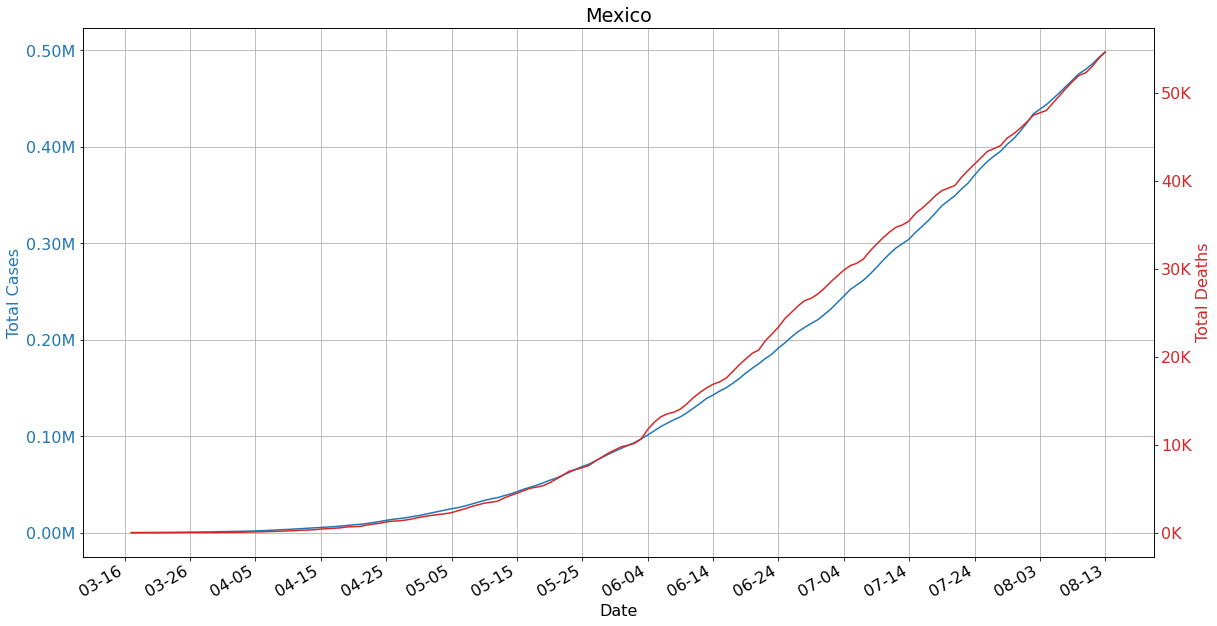

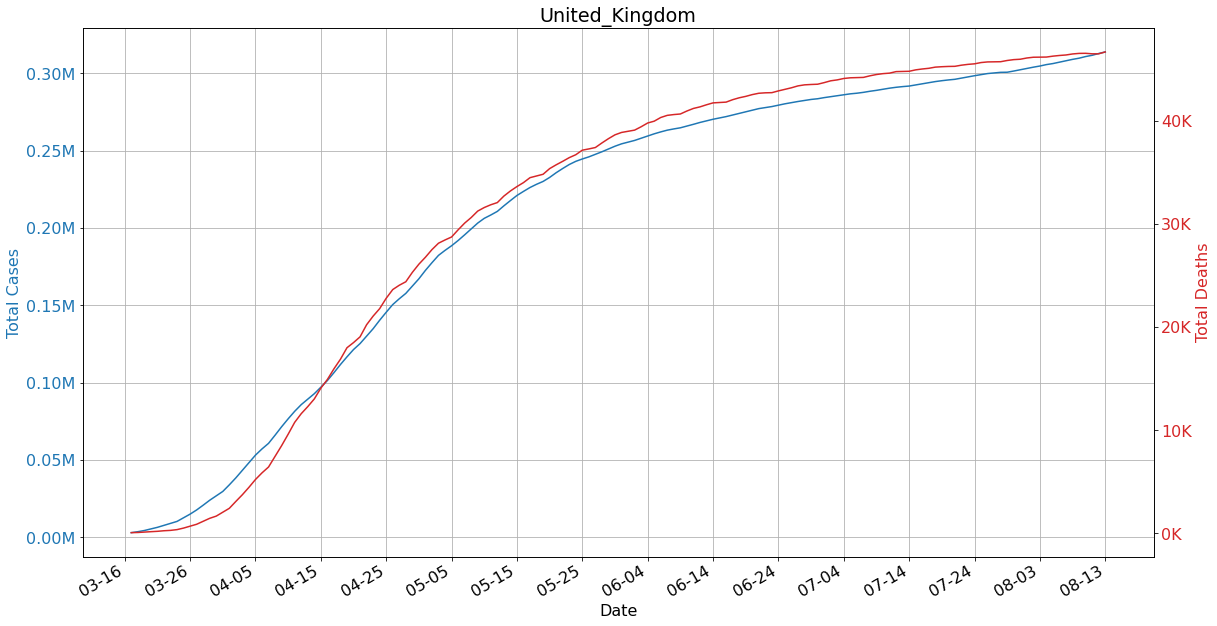

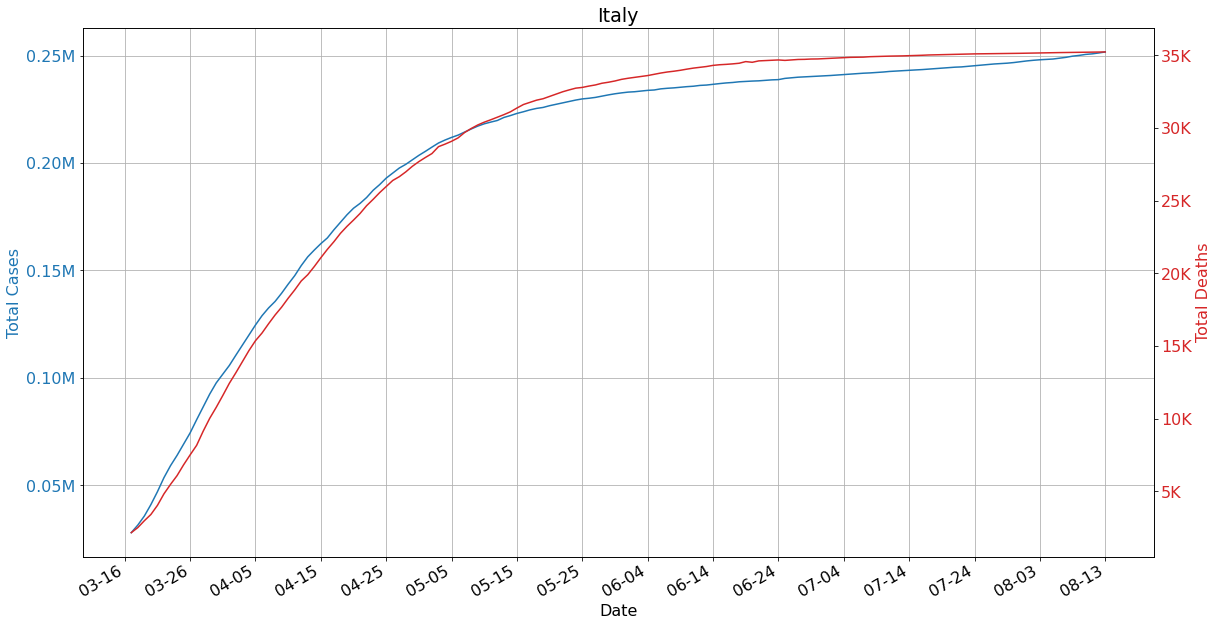

In [31]:
for index in range(1, len(dfCountry)+1,1):
    fig, ax1 = plt.subplots(figsize=(19.20,10.80))
    color = 'tab:blue'
    ax1.plot(dfTotalCases.date, dfTotalCases.iloc[:,index], color=color, label='Total Cases')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Cases', color=color)
    plt.title(dfCountry[index-1])
    ax1.tick_params(axis='y', labelcolor=color)
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.grid()
    
    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.plot(dfTotalDeaths.date, dfTotalDeaths.iloc[:,index], color=color, label = 'Total Deaths')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Total Deaths', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    plt.gcf().autofmt_xdate()
    plt.show()


## <ins>Daily Cases</ins> in the most affected countries

In [32]:
dfNewCases.sort_values(by=['date'], ascending=True)

date  United_States     Brazil      India    Mexico  United_Kingdom  \
0   2020-03-17       887.0000    34.0000    32.0000   29.0000        442.0000   
1   2020-03-18      1766.0000    57.0000    12.0000   11.0000        611.0000   
2   2020-03-19      2988.0000   137.0000    28.0000   25.0000        769.0000   
3   2020-03-20      4835.0000   193.0000    26.0000   46.0000        999.0000   
4   2020-03-21      5374.0000   283.0000    40.0000   39.0000       1055.0000   
..         ...            ...        ...        ...       ...             ...   
145 2020-08-09     56221.0000 49970.0000 64399.0000 6495.0000        758.0000   
146 2020-08-10     46847.0000 23010.0000 62064.0000 4376.0000       1062.0000   
147 2020-08-11     49530.0000 22048.0000 53601.0000 5558.0000        816.0000   
148 2020-08-12     46813.0000 52160.0000 60963.0000 6686.0000       1148.0000   
149 2020-08-13     55941.0000 55155.0000 66999.0000 5858.0000       1009.0000   

        Italy  
0   4000.0000  
1   3526.0000  
2   4207.0000  
3   5322.0000  
4   5986.0000  
..        ...  
145  347.0000  
146  463.0000  
147  259.0000  
148  412.0000  
149  476.0000  

[150 rows x 7 columns]

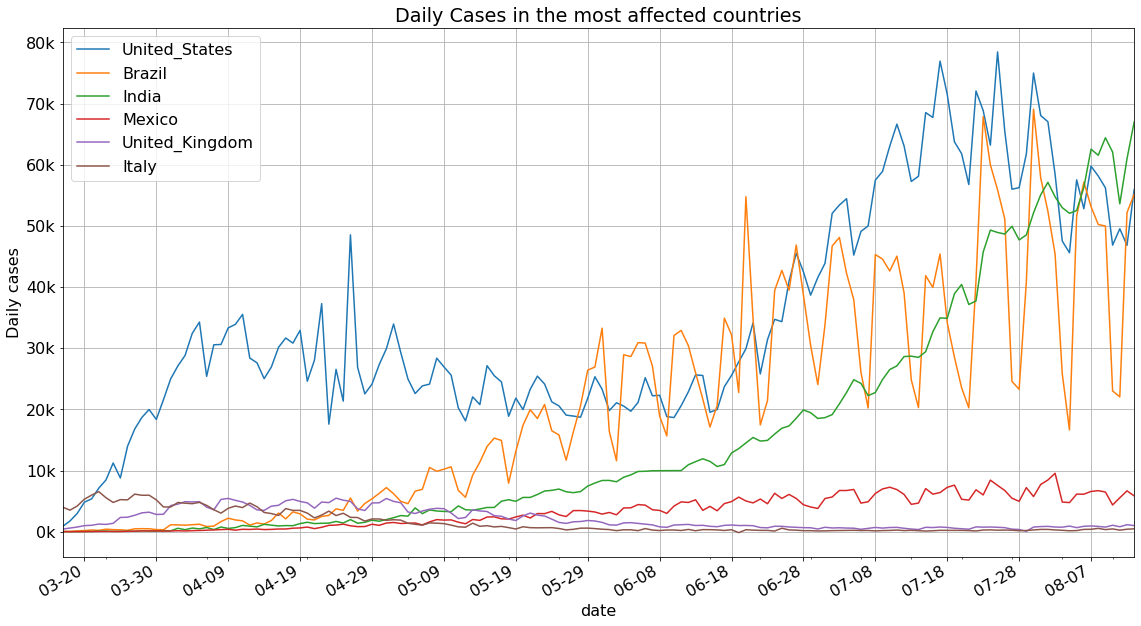

In [33]:
dfNewCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Daily cases')
plt.title('Daily Cases in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

#### Plotly example

In [34]:
toGo = dfNewCases.sort_values(by='date', ascending=False)
toGo = toGo.set_index('date')

In [35]:
figTest = go.Figure()
for index in range(len(dfCountry)):
    figTest.add_trace(go.Scatter(x=toGo.index, y=toGo.iloc[:,index], name=dfCountry[index]))

figTest.update_traces(mode="markers+lines")
figTest.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", 
                                  x=0.01, traceorder='reversed', font_size=15),
                                  title='Daily cases in the most affected countries')

figTest.show()

## <ins>Daily Deaths</ins> in the most affected countries

In [36]:
dfNewDeaths.sort_values(by=['date'], ascending=True)

date  United_States    Brazil     India   Mexico  United_Kingdom  \
0   2020-03-17        16.0000    0.0000    1.0000   0.0000         22.0000   
1   2020-03-18        23.0000    1.0000    0.0000   0.0000         16.0000   
2   2020-03-19        42.0000    3.0000    0.0000   0.0000         34.0000   
3   2020-03-20         0.0000    2.0000    1.0000   0.0000         43.0000   
4   2020-03-21       110.0000    5.0000    0.0000   2.0000         36.0000   
..         ...            ...       ...       ...      ...             ...   
145 2020-08-09      1069.0000  905.0000  861.0000 695.0000         55.0000   
146 2020-08-10       513.0000  572.0000 1007.0000 292.0000          8.0000   
147 2020-08-11       523.0000  703.0000  871.0000 705.0000        -48.0000   
148 2020-08-12      1076.0000 1274.0000  834.0000 926.0000          0.0000   
149 2020-08-13      1490.0000 1175.0000  942.0000 737.0000        180.0000   

       Italy  
0   347.0000  
1   347.0000  
2   473.0000  
3   429.0000  
4   625.0000  
..       ...  
145  13.0000  
146   2.0000  
147   4.0000  
148   6.0000  
149  10.0000  

[150 rows x 7 columns]

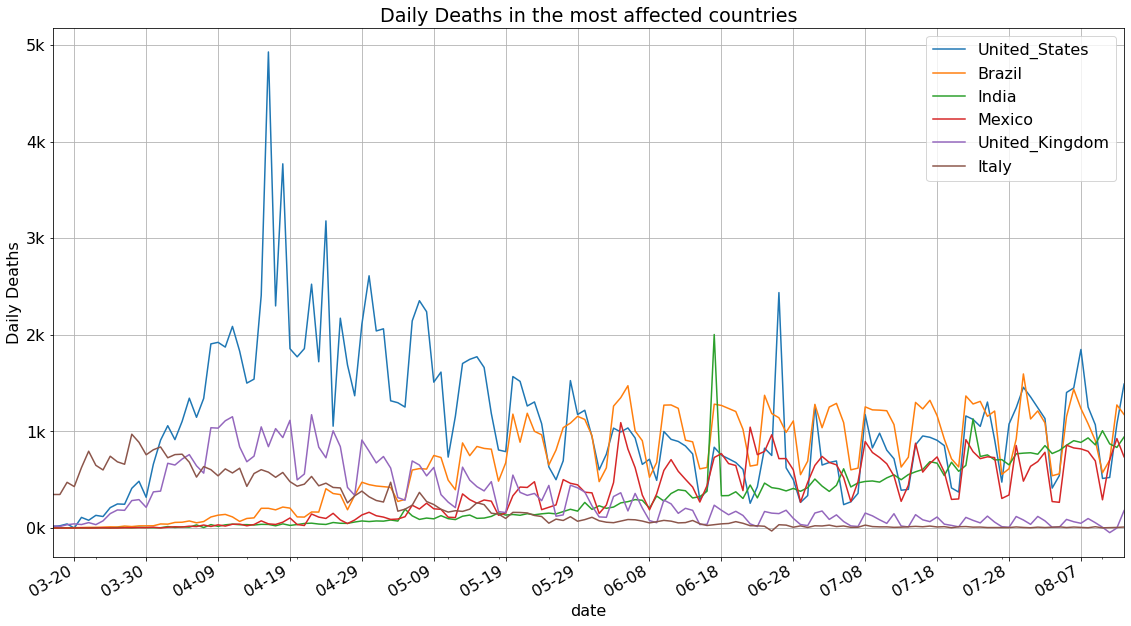

In [37]:
dfNewDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Daily Deaths')
plt.title('Daily Deaths in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Daily cases and deaths by country

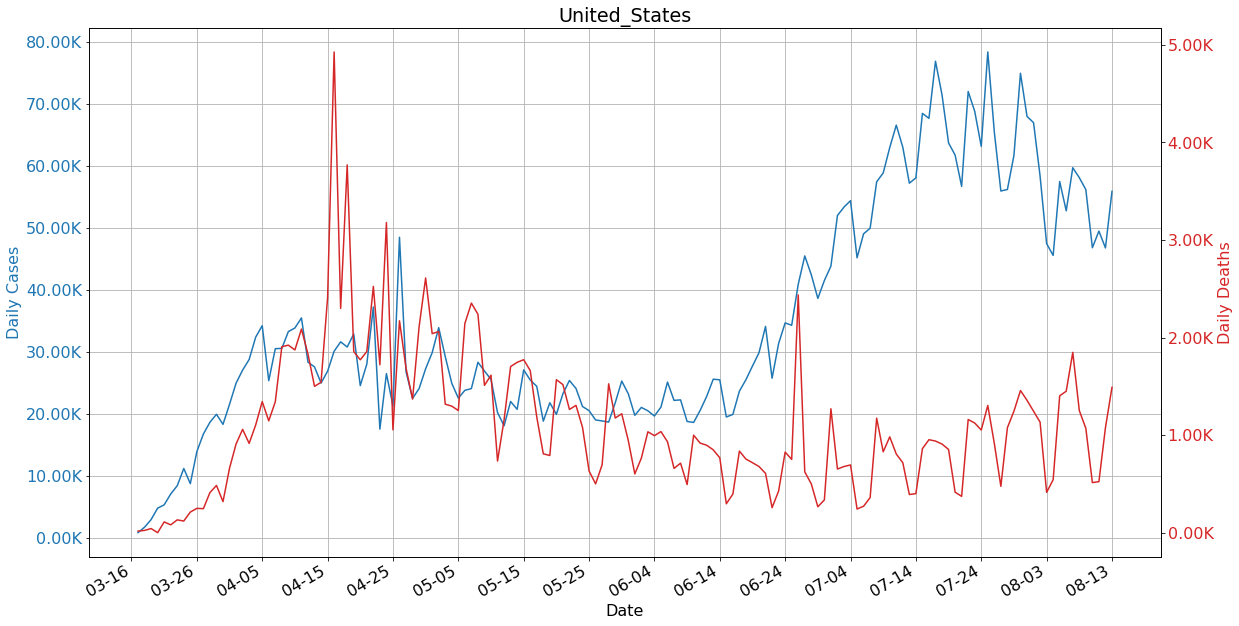

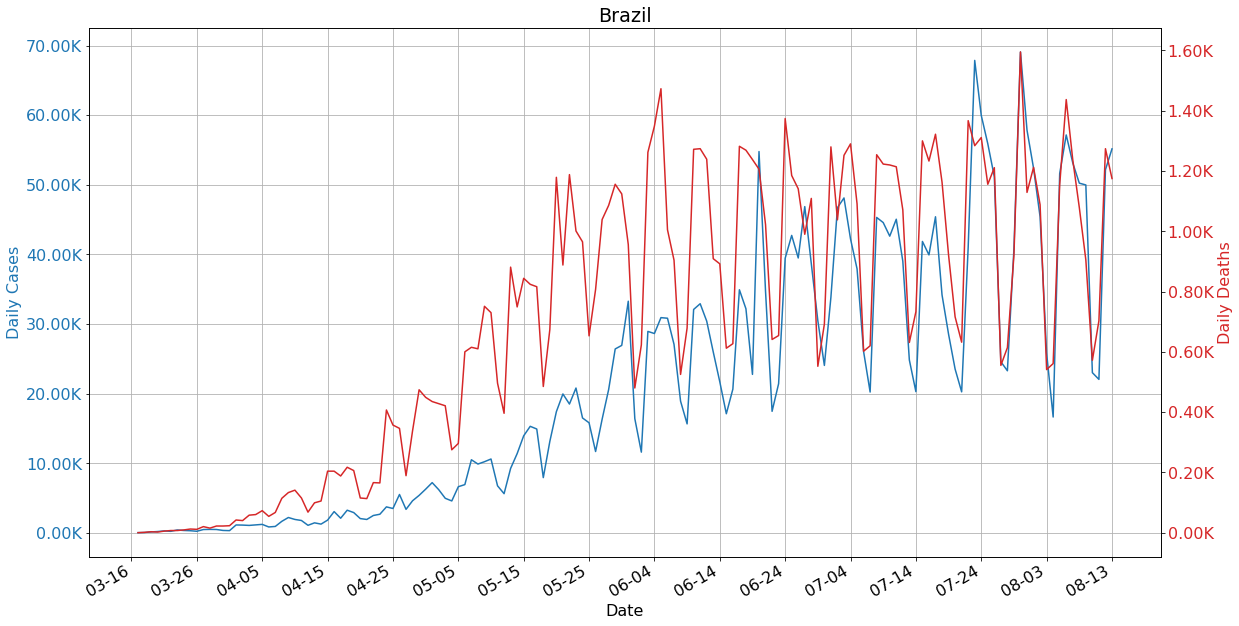

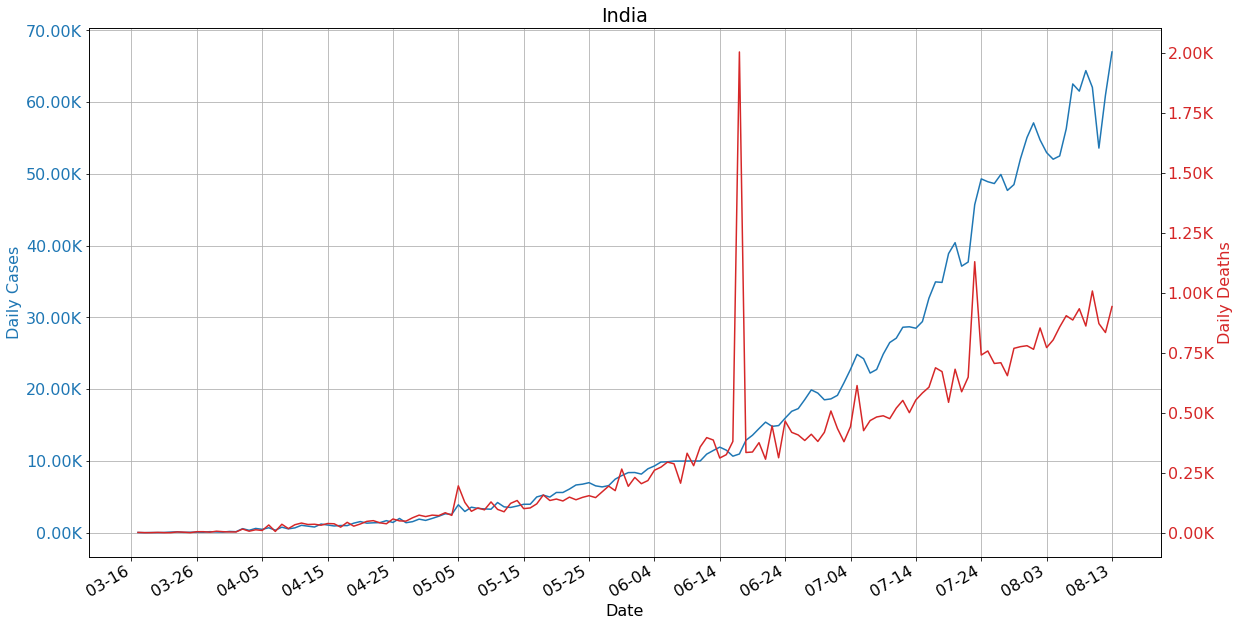

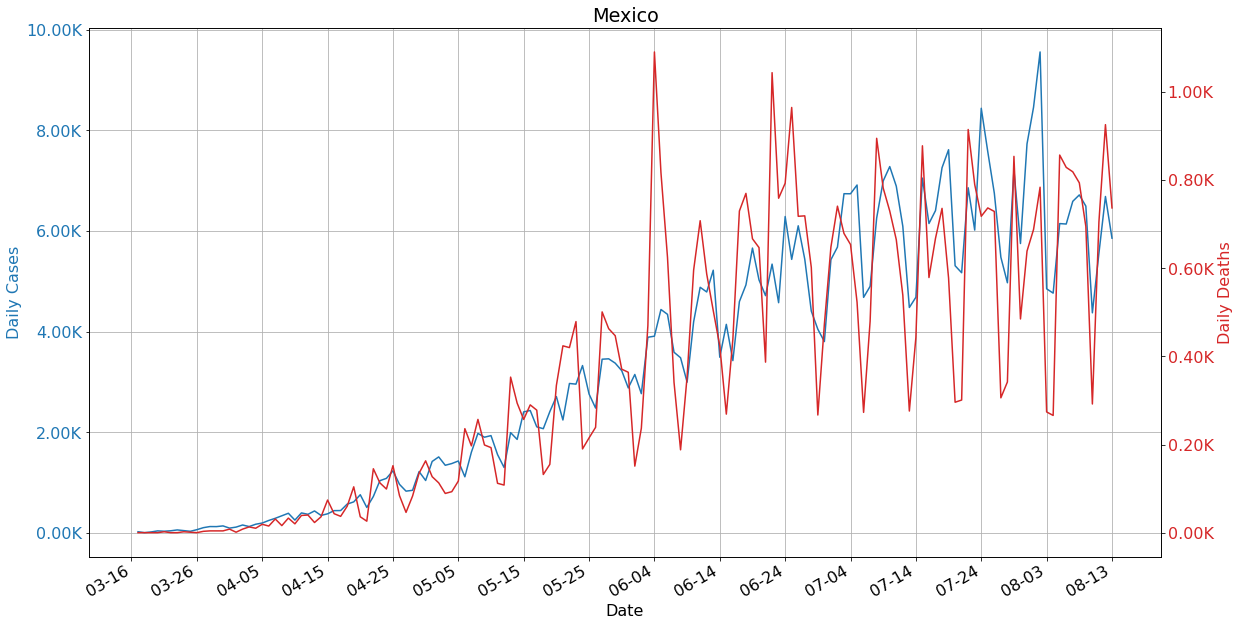

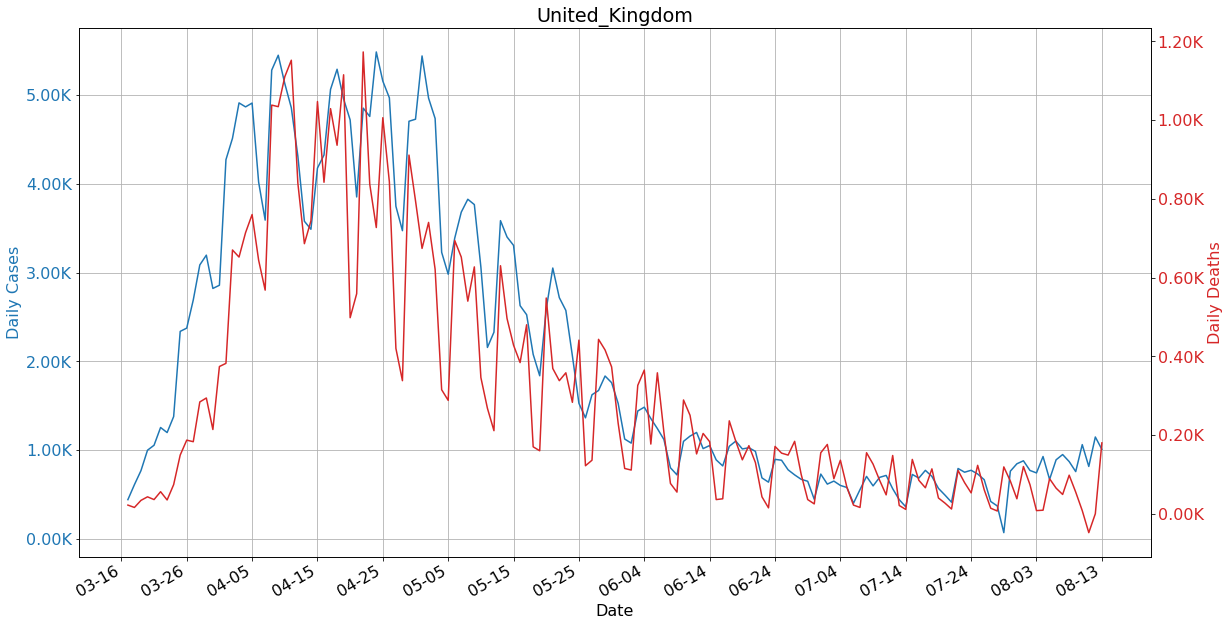

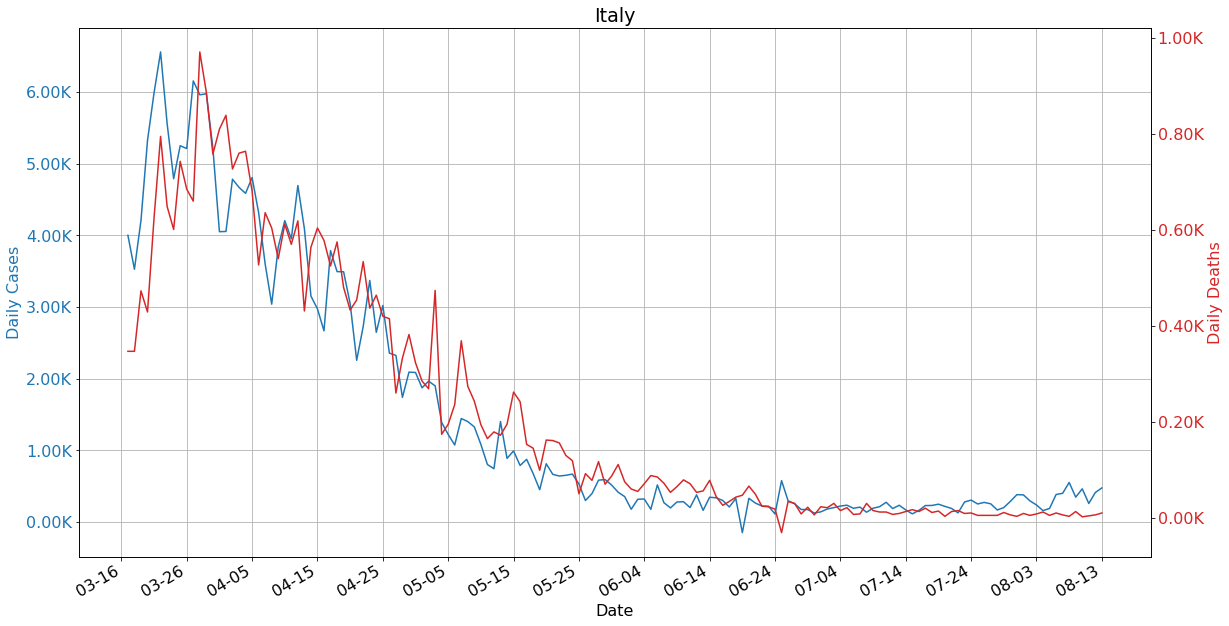

In [38]:
for index in range(1, len(dfCountry)+1,1):
    fig, ax1 = plt.subplots(figsize=(19.20,10.80))
    color = 'tab:blue'
    ax1.plot(dfNewCases.date, dfNewCases.iloc[:,index], color=color, label='Total Cases')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Cases', color=color)
    plt.title(dfCountry[index-1])
    ax1.tick_params(axis='y', labelcolor=color)
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.grid()
    
    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.plot(dfNewDeaths.date, dfNewDeaths.iloc[:,index], color=color, label = 'Total Deaths')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Daily Deaths', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000) + 'K'))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000) + 'K'))

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    plt.gcf().autofmt_xdate()
    plt.show()

## <span style="color:green">Brazil Cases</span>

### source: https://data.brasil.io/dataset/covid19/_meta/list.html

In [39]:
df = pd.read_csv('caso_full.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()
df

city  city_ibge_code       date  epidemiological_week  \
0          São Paulo    3550308.0000 2020-02-25                     9   
2          São Paulo    3550308.0000 2020-02-26                     9   
4          São Paulo    3550308.0000 2020-02-27                     9   
6          São Paulo    3550308.0000 2020-02-28                     9   
8          São Paulo    3550308.0000 2020-02-29                     9   
...              ...             ...        ...                   ...   
515494    Tocantínia    1721109.0000 2020-08-10                    33   
515495      Tupirama    1721257.0000 2020-08-10                    33   
515496    Tupiratins    1721307.0000 2020-08-10                    33   
515497  Wanderlândia    1722081.0000 2020-08-10                    33   
515498       Xambioá    1722107.0000 2020-08-10                    33   

        estimated_population_2019  is_last  is_repeated  \
0                   12252023.0000    False        False   
2                   12252023.0000    False        False   
4                   12252023.0000    False        False   
6                   12252023.0000    False        False   
8                   12252023.0000    False        False   
...                           ...      ...          ...   
515494                  7545.0000    False         True   
515495                  1891.0000    False         True   
515496                  2671.0000    False         True   
515497                 11683.0000    False         True   
515498                 11540.0000    False         True   

        last_available_confirmed  \
0                              1   
2                              1   
4                              1   
6                              2   
8                              2   
...                          ...   
515494                       256   
515495                        23   
515496                         6   
515497                       182   
515498                       597   

        last_available_confirmed_per_100k_inhabitants last_available_date  \
0                                              0.0082          2020-02-25   
2                                              0.0082          2020-02-26   
4                                              0.0082          2020-02-27   
6                                              0.0163          2020-02-28   
8                                              0.0163          2020-02-29   
...                                               ...                 ...   
515494                                      3392.9755          2020-08-08   
515495                                      1216.2877          2020-08-08   
515496                                       224.6350          2020-08-08   
515497                                      1557.8191          2020-08-08   
515498                                      5173.3102          2020-08-08   

        last_available_death_rate  last_available_deaths  order_for_place  \
0                          0.0000                      0                1   
2                          0.0000                      0                2   
4                          0.0000                      0                3   
6                          0.0000                      0                4   
8                          0.0000                      0                5   
...                           ...                    ...              ...   
515494                     0.0156                      4               84   
515495                     0.0435                      1               80   
515496                     0.0000                      0               80   
515497                     0.0275                      5              105   
515498                     0.0134                      8               94   

       place_type state  new_confirmed  new_deaths  
0            city    SP              1           0  
2            city    SP              0   

In [40]:
cities = set(df.loc[:, 'city'].values)

In [41]:
brStates = sorted(set(df.loc[:, 'state'].values))

In [42]:
print(pd.to_datetime("today") - pd.to_timedelta('4days'))

2020-08-09 15:43:42.868214


In [43]:
least_recent_date = df['date'].min()
least_recent_date

Timestamp('2020-02-25 00:00:00')

In [44]:
recent_date = df['date'].max()
recent_date

Timestamp('2020-08-10 00:00:00')

In [45]:
(recent_date - pd.to_timedelta('1days'))

Timestamp('2020-08-09 00:00:00')

In [46]:
dfSelect = df.loc[:,['date', 'state', 'city', 'new_confirmed', 'new_deaths']]
dfToday = dfSelect[dfSelect['date'] > (recent_date - pd.to_timedelta('1days'))]
dfToday

date state          city  new_confirmed  new_deaths
509978 2020-08-10    AC    Acrelândia              0           0
509979 2020-08-10    AC  Assis Brasil              0           0
509980 2020-08-10    AC     Brasiléia              0           0
509981 2020-08-10    AC        Bujari              0           0
509982 2020-08-10    AC      Capixaba              0           0
...           ...   ...           ...            ...         ...
515494 2020-08-10    TO    Tocantínia              0           0
515495 2020-08-10    TO      Tupirama              0           0
515496 2020-08-10    TO    Tupiratins              0           0
515497 2020-08-10    TO  Wanderlândia              0           0
515498 2020-08-10    TO       Xambioá              0           0

[5486 rows x 5 columns]

In [47]:
sumCases = dfSelect.groupby(['state']).sum()
sumCases.reset_index(level=0, inplace=True)
sumCases.loc[sumCases['new_confirmed'] <= 120000, ['state']] = 'Other_States'

In [48]:
sumCases = sumCases.groupby(['state']).sum()
sumCases = sumCases.sort_values(by=['new_confirmed'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

state  new_confirmed  new_deaths
0  Other_States        1382022       37340
1            SP         598609       24447
2            BA         190705        3987
3            CE         187207        7992
4            RJ         180025       14109
5            PA         169618        5900
6            MG         154641        3556
7            MA         130576        3187

## Cases in Brazil cities

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fe13b3ac8>,
      dtype=object)

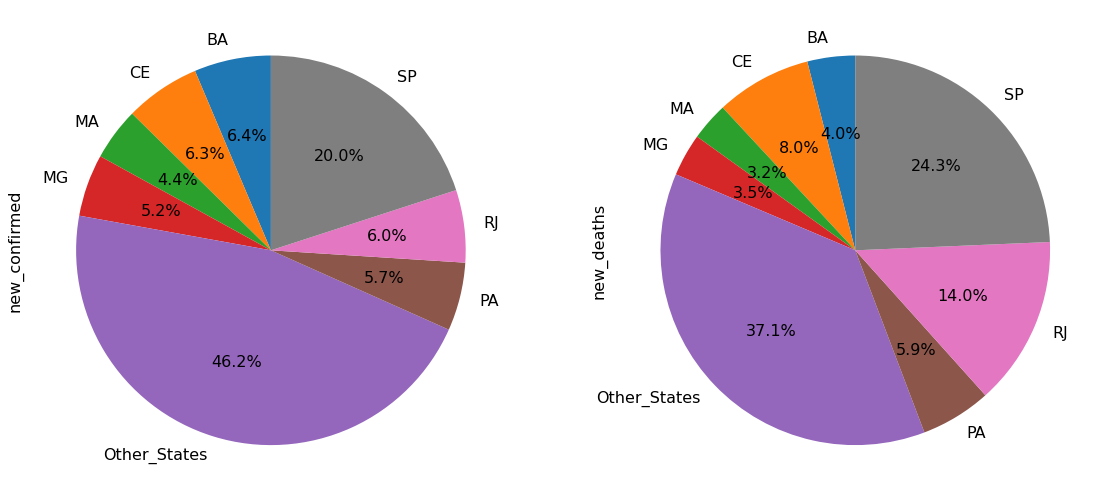

In [49]:
sumCases.groupby(['state']).sum().plot(kind='pie', legend=None, subplots=True, startangle=90,
                                       figsize=(19.20,10.80), autopct='%1.1f%%')

In [50]:
dfSP = dfToday[(dfToday['state'] == 'SP') & (dfToday['new_confirmed'] > 100)]
dfSP = dfSP.sort_values(by=['new_confirmed'], ascending=False)
dfSP

Empty DataFrame
Columns: [date, state, city, new_confirmed, new_deaths]
Index: []

In [51]:
today = (pd.to_datetime("today") - pd.to_timedelta('2days')).date()
today

datetime.date(2020, 8, 11)

In [52]:
# dfSP.plot.barh(x='city', y=['new_confirmed','new_deaths'], figsize=(19.20,10.80))
# plt.title('Daily cases and deaths in SP - '+str(today))
# plt.grid()

## Forecast to daily deaths [WORLD]

#### LSTM Network for Regression

#### Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [53]:
dfPredict = dfWorld.loc[:,['date','new_deaths']]
dfPredict = dfPredict[(dfWorld['new_deaths'] > 200)]
dfPredict = dfPredict.sort_values(by='date', ascending=True)
dfPredict['date'] = dfPredict['date'].dt.year.astype('str')+'-'+dfPredict['date'].dt.month.astype('str')+'-'+dfPredict['date'].dt.day.astype('str')
dfPredict.reset_index(drop=True, inplace=True)
dfPredict

date  new_deaths
0    2020-3-17    608.0000
1    2020-3-18    812.0000
2    2020-3-19    959.0000
3    2020-3-20   1060.0000
4    2020-3-21   1384.0000
..         ...         ...
145   2020-8-9   5673.0000
146  2020-8-10   4488.0000
147  2020-8-11   4983.0000
148  2020-8-12   6109.0000
149  2020-8-13   7018.0000

[150 rows x 2 columns]

In [54]:
dfDeaths = dfPredict.drop(['date'],axis=1)

In [55]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dfDeaths)

In [56]:
train_size = int(len(dataset)*0.75)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train), len(test))

112 38


In [57]:
def create_dataset(dataset, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookBack-1):
        a = dataset[i:(i+lookBack),0]
        dataX.append(a)
        dataY.append(dataset[i+lookBack,0])
    return np.array(dataX), np.array(dataY)

In [58]:
lookBack = 1
trainX, trainY = create_dataset(train, lookBack)
testX, testY = create_dataset(test, lookBack)

In [59]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [60]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=((1, lookBack))))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [61]:
history = model.fit(trainX, trainY, epochs=50, batch_size=10, validation_split=0.01, verbose=1, shuffle=False)

Epoch 1/50
11/11 [==============================] - 1s 107ms/step - loss: 0.1882 - mse: 0.1882 - val_loss: 0.1315 - val_mse: 0.1315
Epoch 2/50
11/11 [==============================] - 0s 10ms/step - loss: 0.1410 - mse: 0.1410 - val_loss: 0.0891 - val_mse: 0.0891
Epoch 3/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0999 - mse: 0.0999 - val_loss: 0.0534 - val_mse: 0.0534
Epoch 4/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0657 - mse: 0.0657 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 5/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0404 - mse: 0.0404 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 6/50
11/11 [==============================] - 0s 11ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 7/50
11/11 [==============================] - 0s 11ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 8/50
11/11 [==============================] - 0s 12ms/step - loss: 0.0176 - 

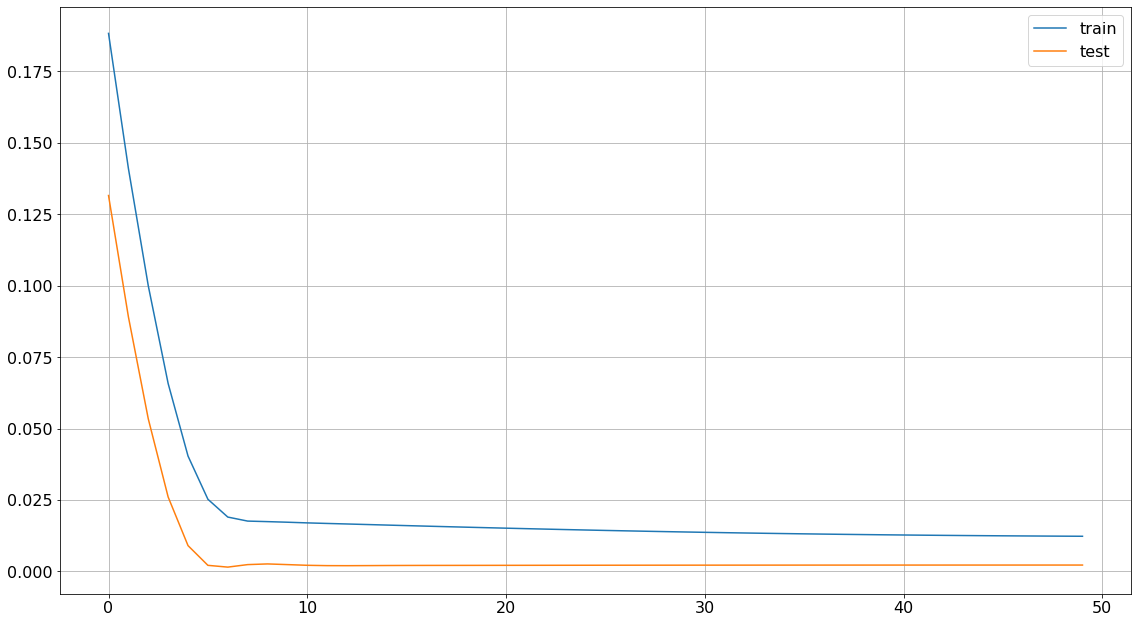

In [62]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend()

In [63]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [64]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [65]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1083.84 RMSE
Test Score: 1213.72 RMSE


In [66]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookBack:len(trainPredict)+lookBack, :] = trainPredict

In [67]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookBack*2)+1:len(dataset)-1, :] = testPredict

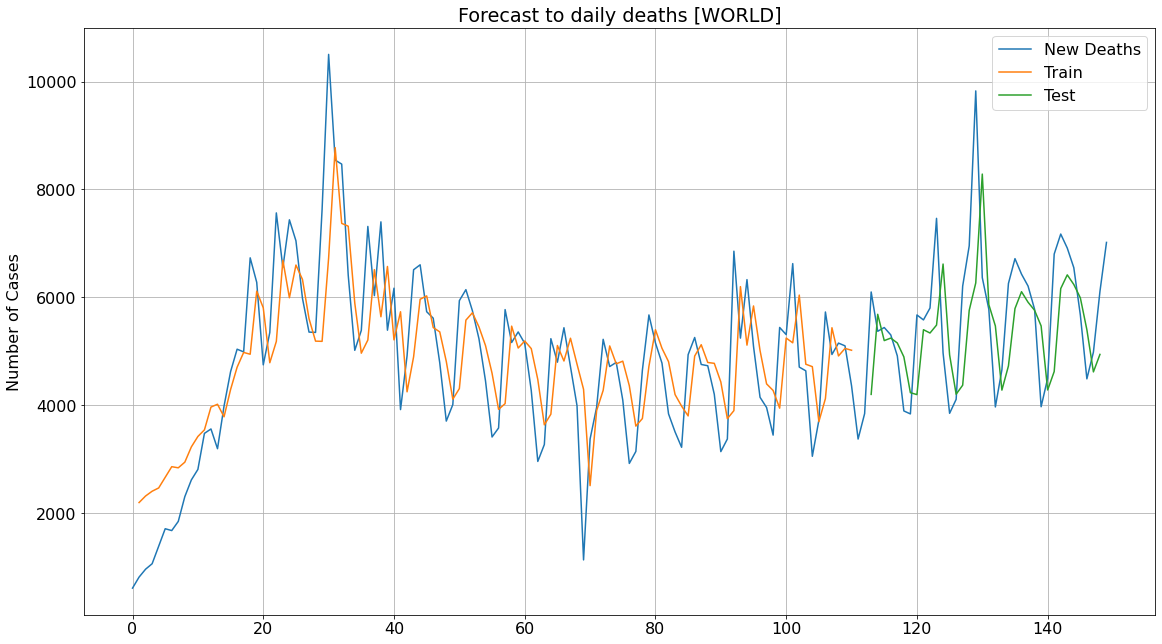

In [68]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.ylabel('Number of Cases')
plt.title('Forecast to daily deaths [WORLD]')

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().legend(('New Deaths','Train','Test'))

plt.grid()
plt.show()

### Simple Linear Regression

#### Source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

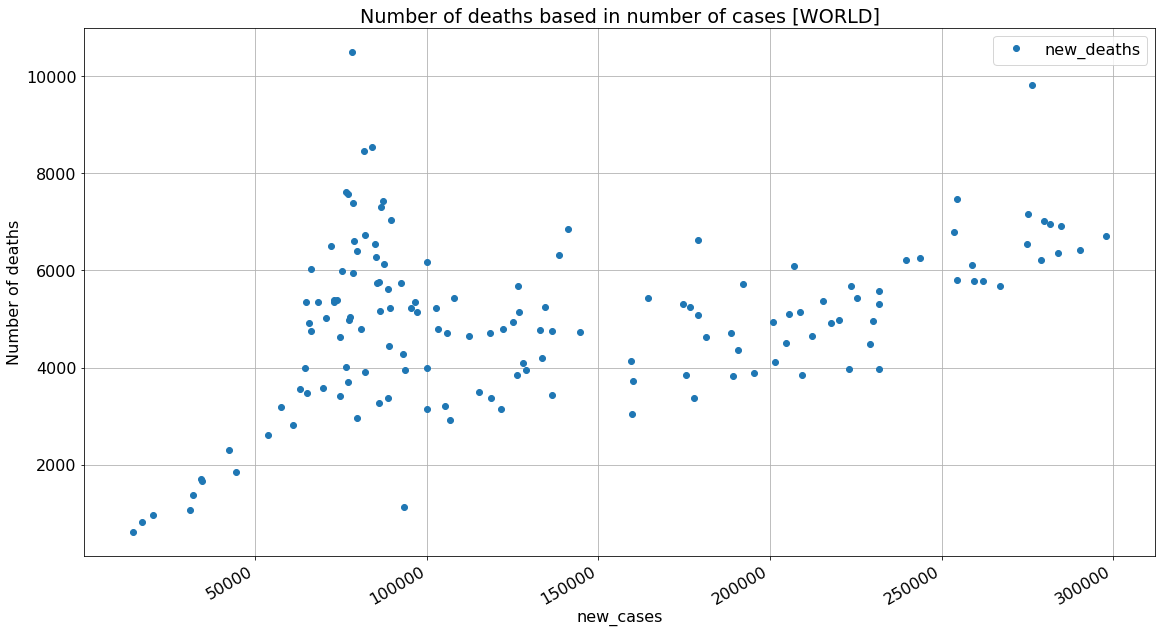

In [69]:
dfWorld.plot(x='new_cases', y='new_deaths', style='o', figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Number of deaths based in number of cases [WORLD]')

ax = plt.gca()
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

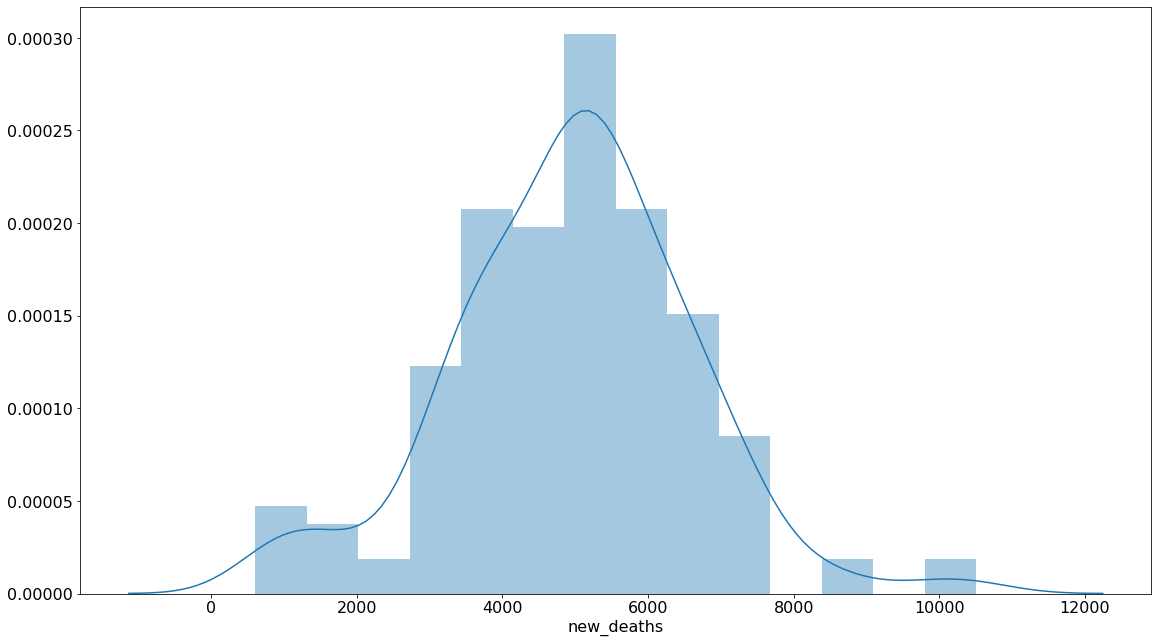

In [70]:
plt.figure(figsize=(19.20,10.80))
plt.tight_layout()
seabornInstance.distplot(dfWorld['new_deaths'])

In [71]:
X = dfWorld['new_deaths'].values.reshape(-1,1)
y = dfWorld['new_cases'].values.reshape(-1,1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [73]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [74]:
print(regressor.intercept_)

[50209.86776531]


In [75]:
print(regressor.coef_)

[[17.01977237]]


In [76]:
y_pred = regressor.predict(X_test)

In [77]:
dfLinear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfLinear

Actual   Predicted
0  215487.0000 141606.0454
1   79710.0000 100537.3347
2   79637.0000 159272.5691
3  200932.0000 134287.5433
4   44329.0000  81611.3478
..         ...         ...
55 212234.0000 129470.9477
56 192066.0000 147699.1239
57 229259.0000 126594.6062
58  78522.0000 151273.2761
59 220018.0000 135019.3935

[60 rows x 2 columns]

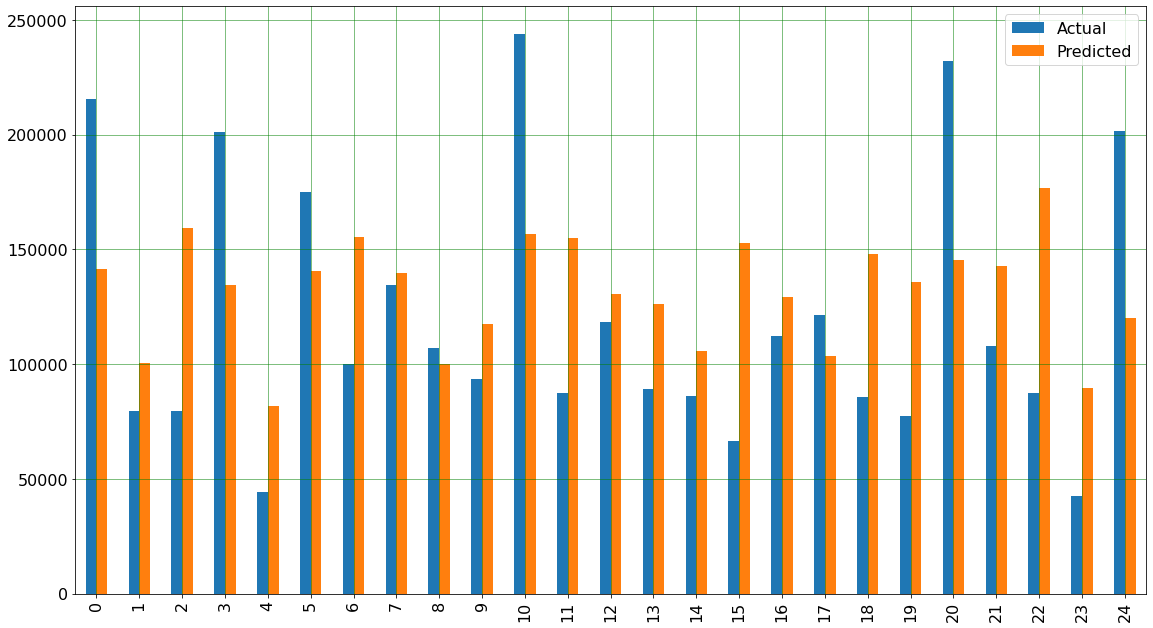

In [78]:
dfLinear = dfLinear.head(25)
dfLinear.plot(kind='bar',figsize=(19.20,10.80))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

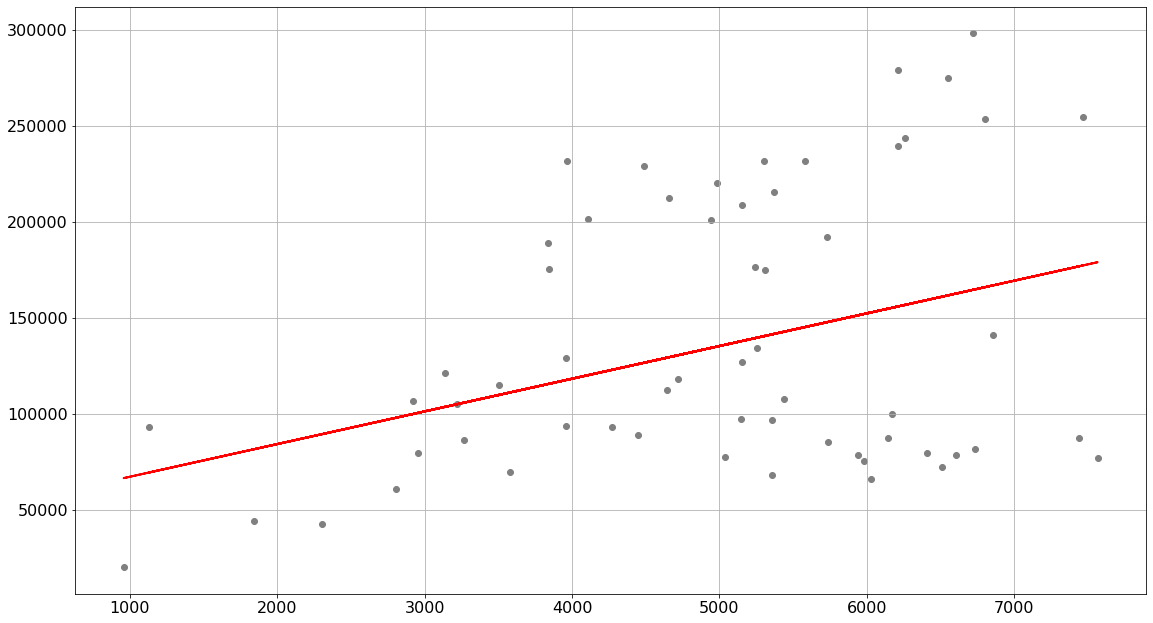

In [79]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.grid()
plt.show()

In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 58111.042363173416
Mean Squared Error: 4461800584.482247
Root Mean Squared Error: 4461800584.482247


### Polynomial Regression

#### Source: https://towardsdatascience.com/understanding-regression-using-covid-19-dataset-detailed-analysis-be7e319e3a50

In [81]:
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin = LinearRegression()
lin.fit(X_poly, y)
pred = lin.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

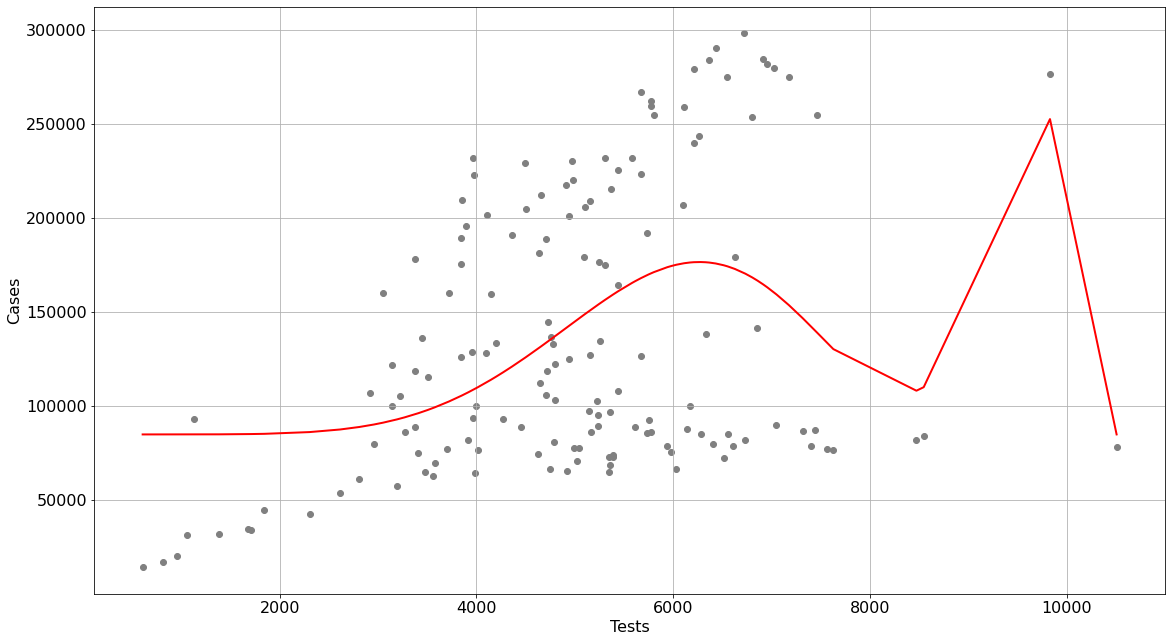

In [82]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X, y, color='gray')
plt.plot(new_X, new_y, color='red', linewidth=2)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.grid()
plt.show()